## <center>Wine Quality Prediction Using Machine Learning

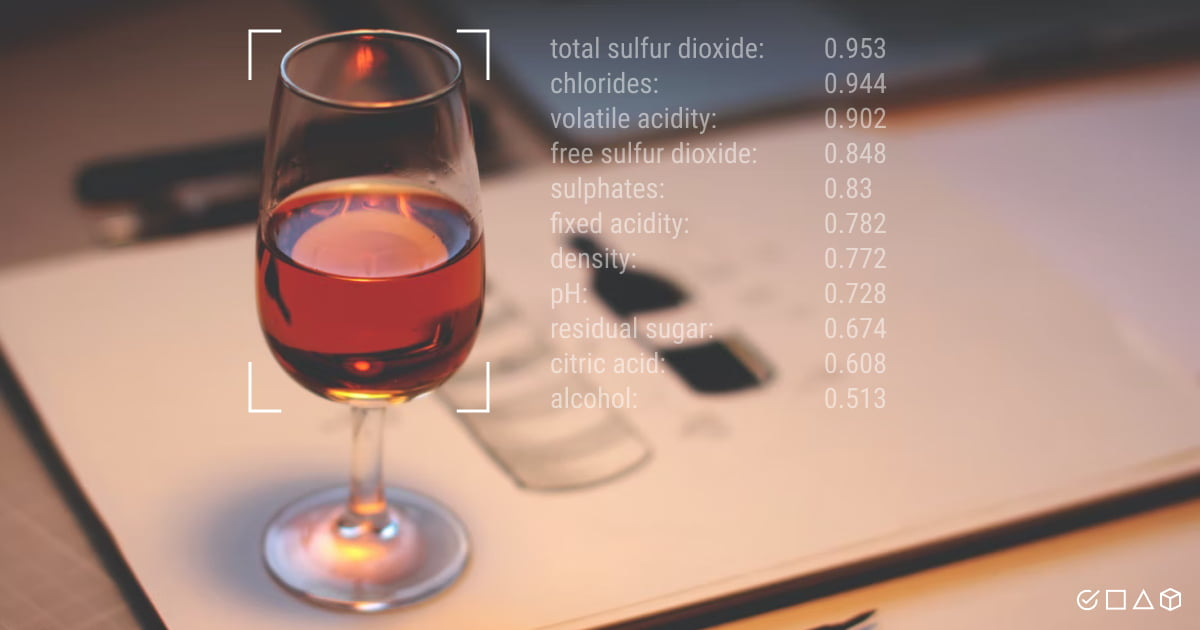

##### Dataset link
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from itertools import cycle
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('./winequality-red.csv')
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
923,6.8,0.41,0.31,8.8,0.084,26.0,45.0,0.99824,3.38,0.64,10.1,6
408,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
91,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
679,10.8,0.26,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,5
1125,8.8,0.24,0.35,1.7,0.055,13.0,27.0,0.99394,3.14,0.59,11.3,7
465,10.0,0.29,0.40,2.9,0.098,10.0,26.0,1.00060,3.48,0.91,9.7,5
540,9.2,0.59,0.24,3.3,0.101,20.0,47.0,0.99880,3.26,0.67,9.6,5
359,12.6,0.38,0.66,2.6,0.088,10.0,41.0,1.00100,3.17,0.68,9.8,6
1392,7.1,0.62,0.06,1.3,0.070,5.0,12.0,0.99420,3.17,0.48,9.8,5
1268,6.9,0.41,0.31,2.0,0.079,21.0,51.0,0.99668,3.47,0.55,9.5,6


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.isnull().mean()*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [7]:
df.duplicated().mean()*100

15.0093808630394

In [8]:
df.drop_duplicates(inplace=True)

# EDA

##### Univariate Analysis

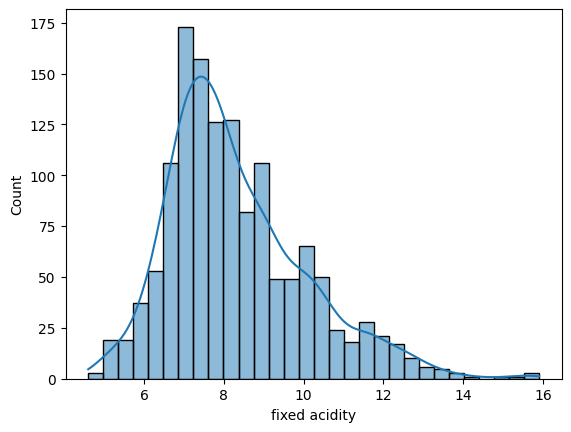

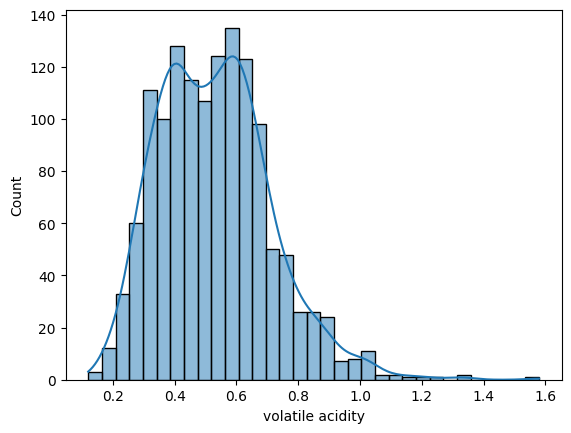

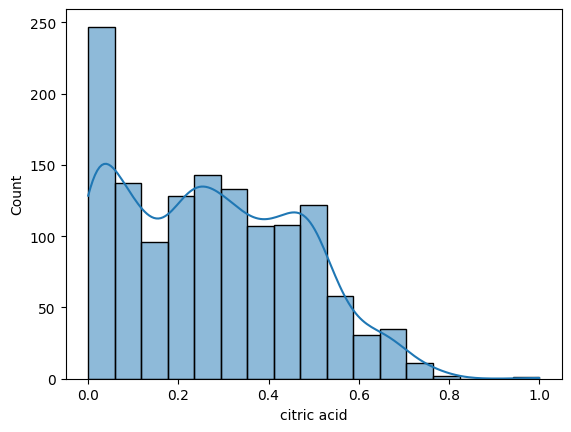

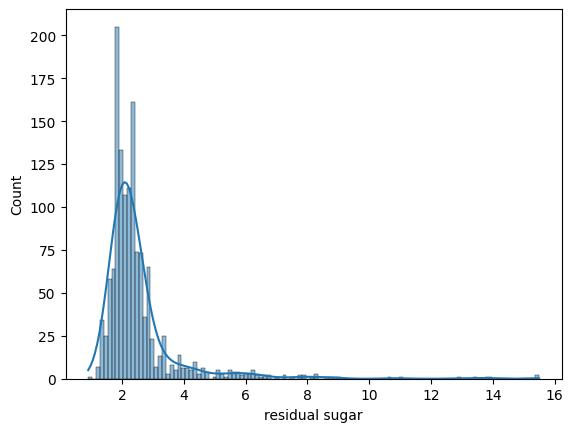

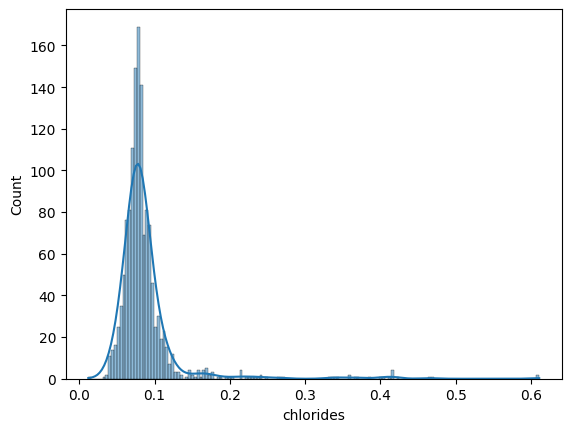

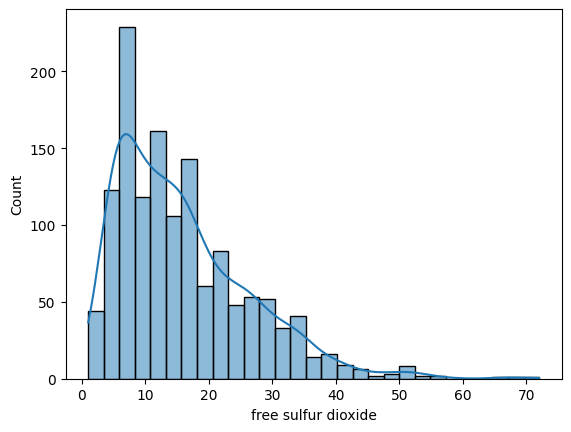

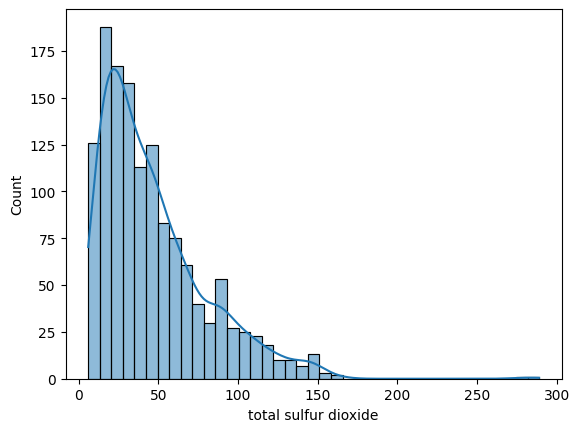

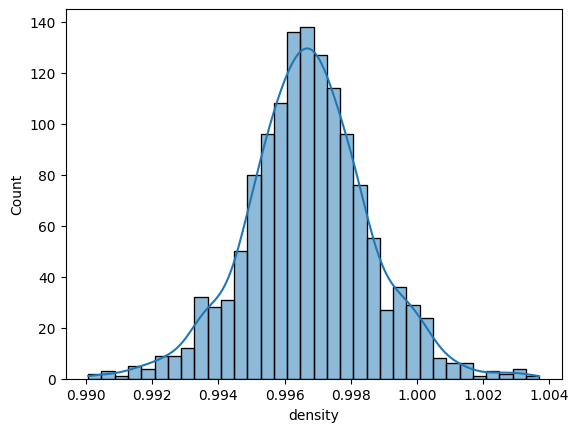

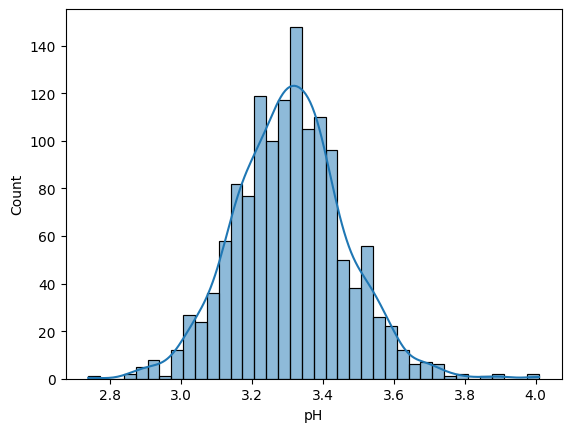

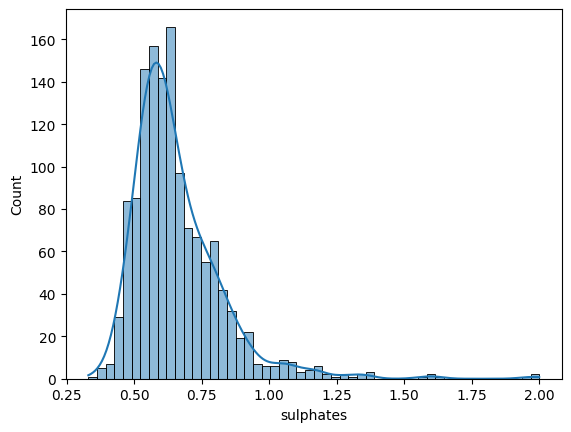

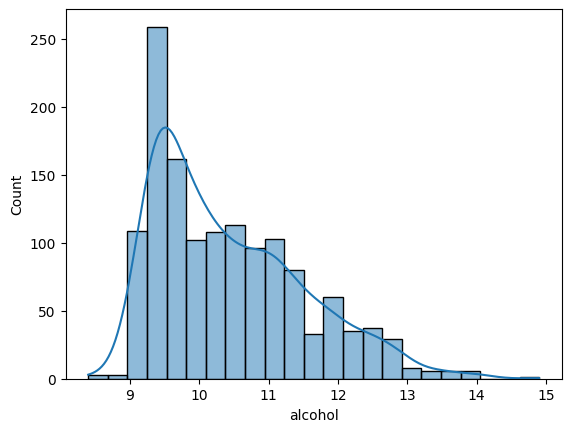

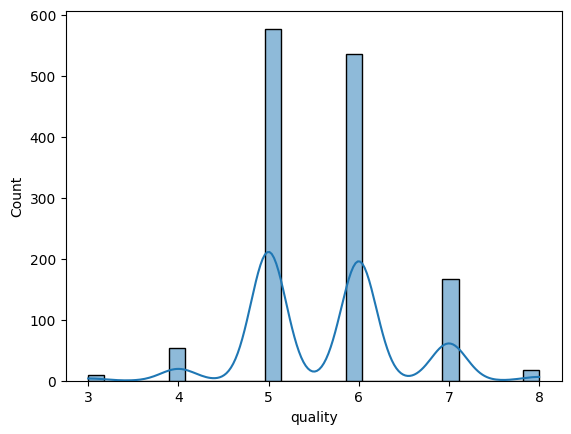

In [9]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i],kde=True)
        plt.show()

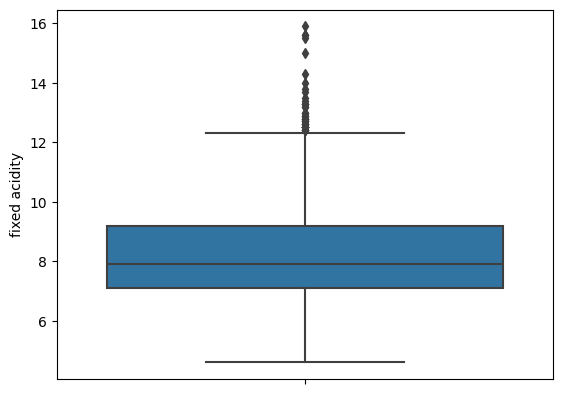

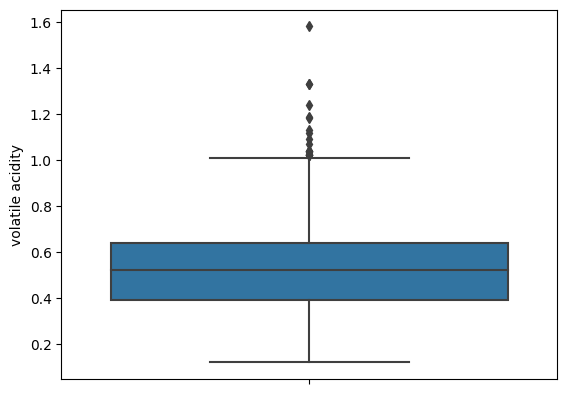

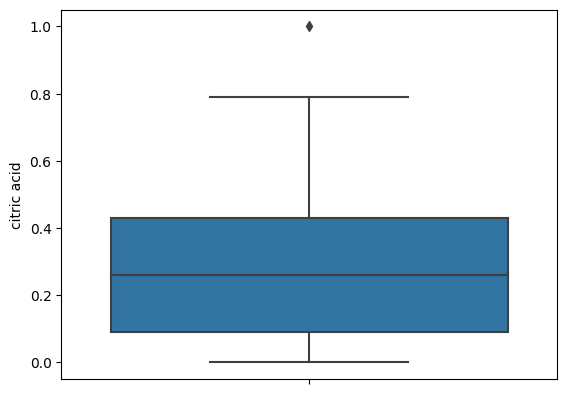

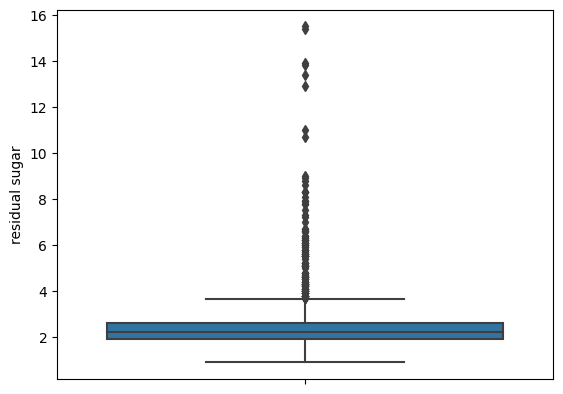

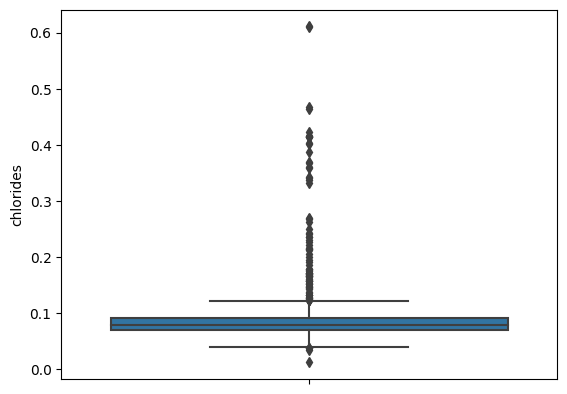

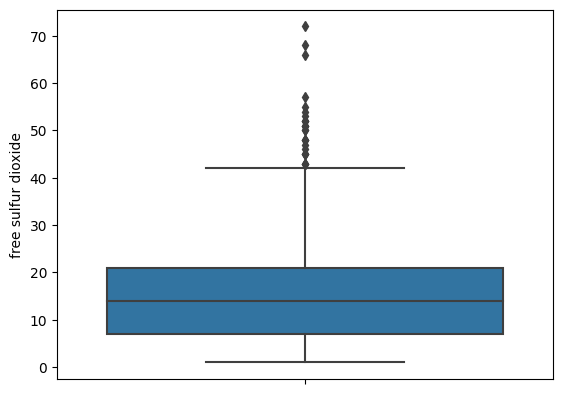

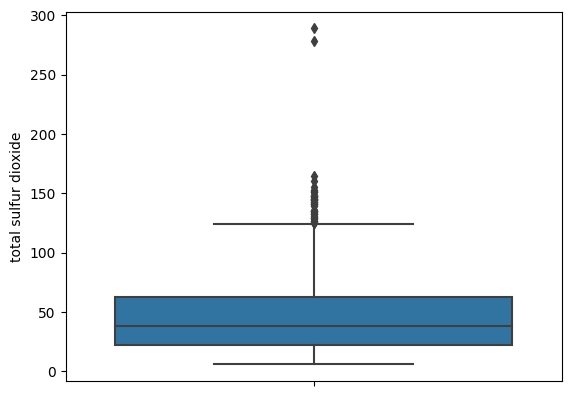

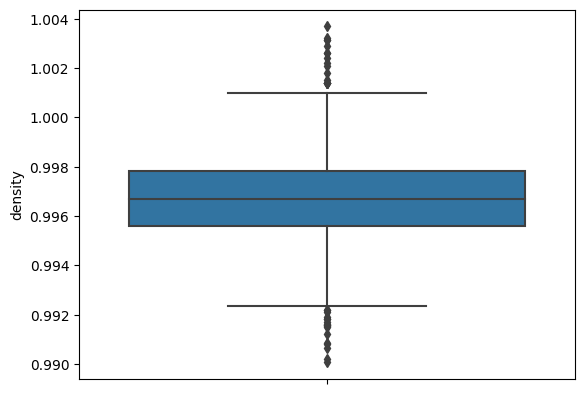

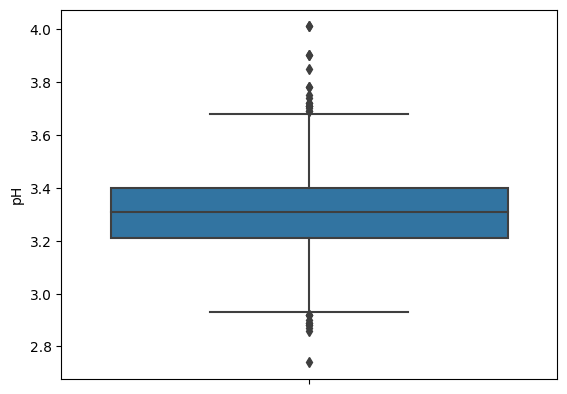

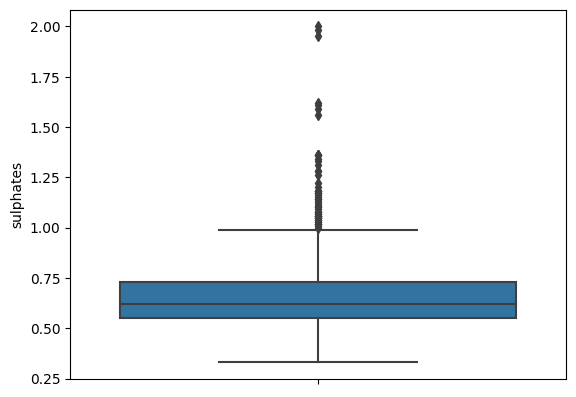

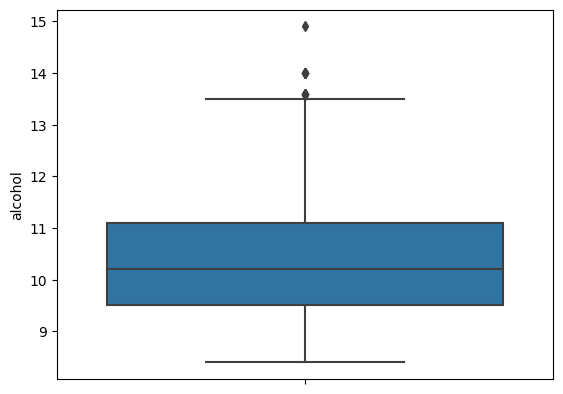

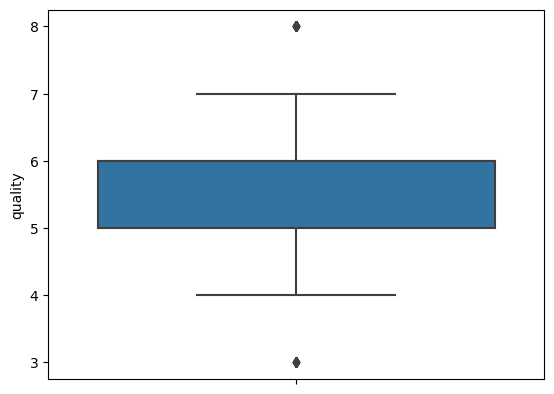

In [10]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show()

##### Multi-variate Analysis

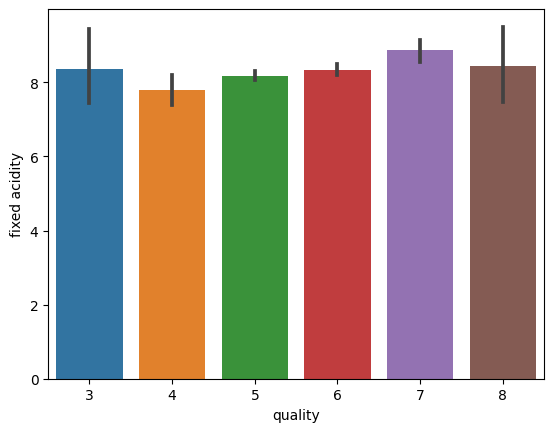

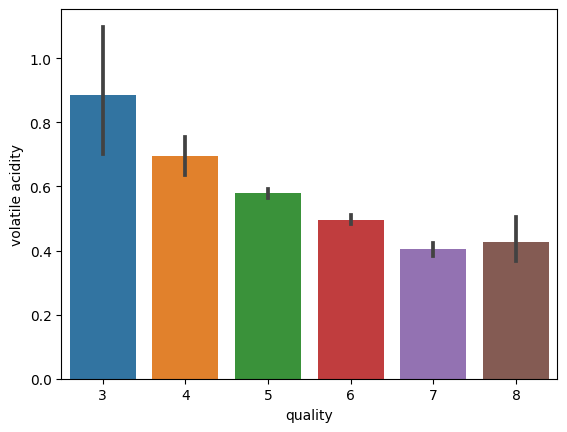

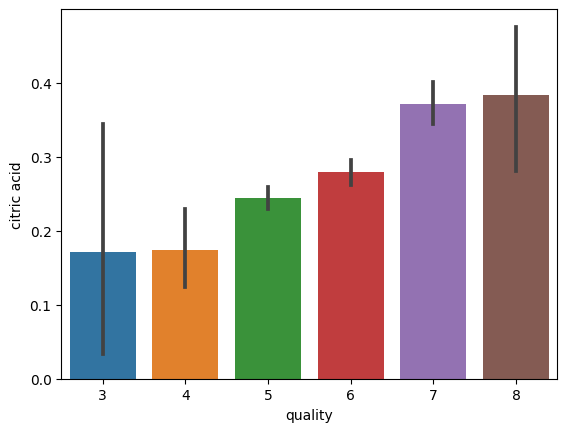

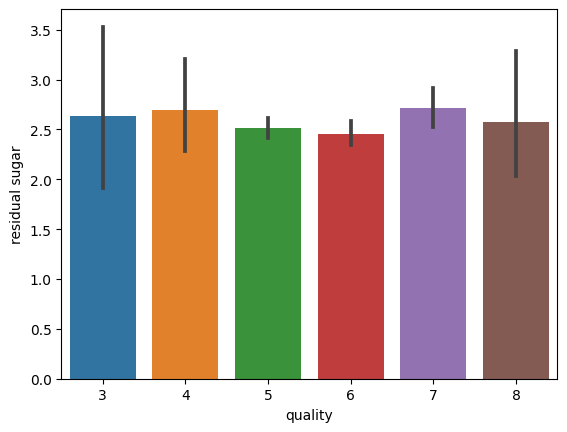

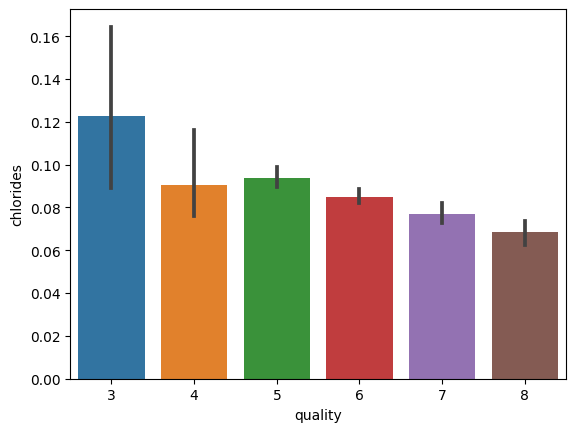

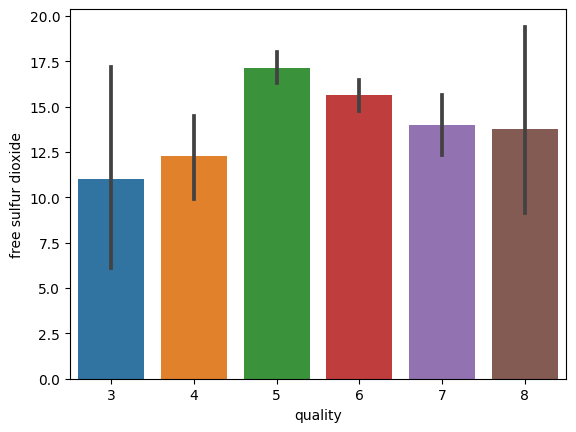

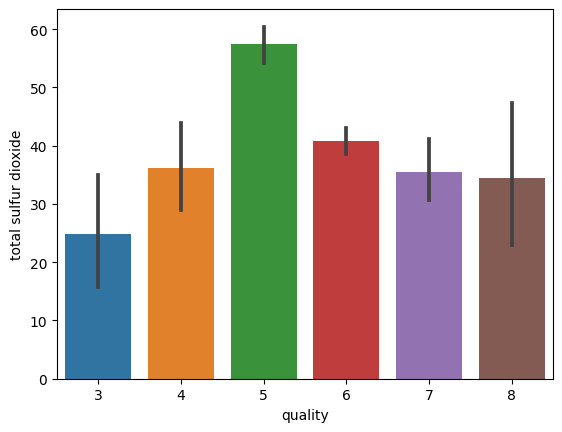

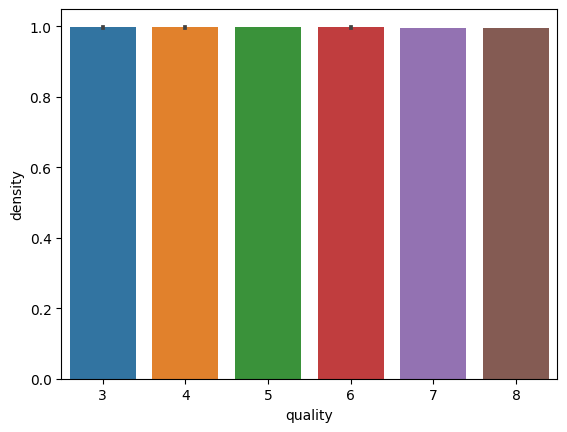

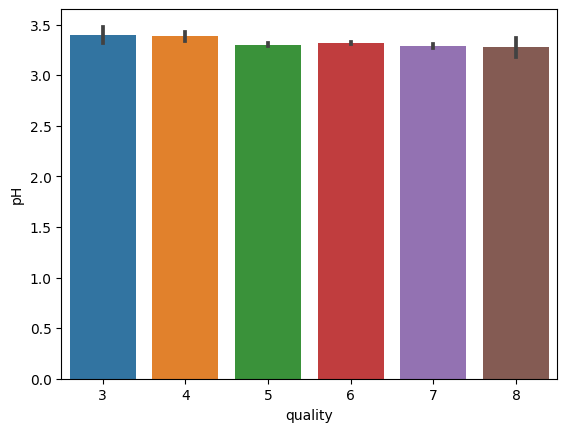

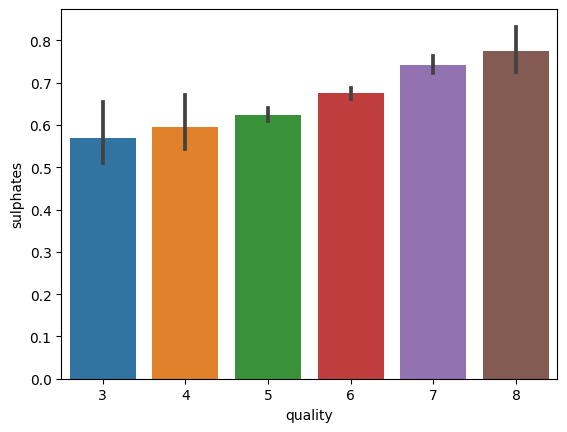

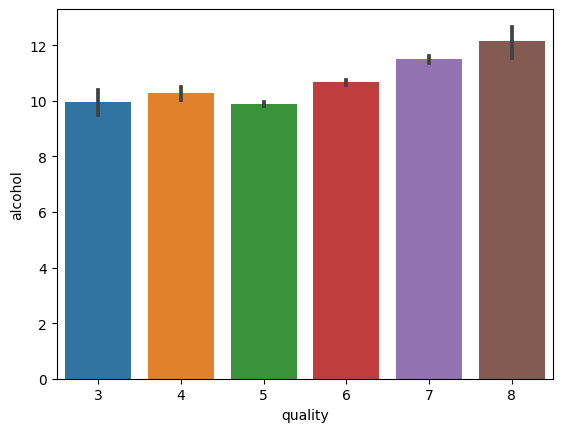

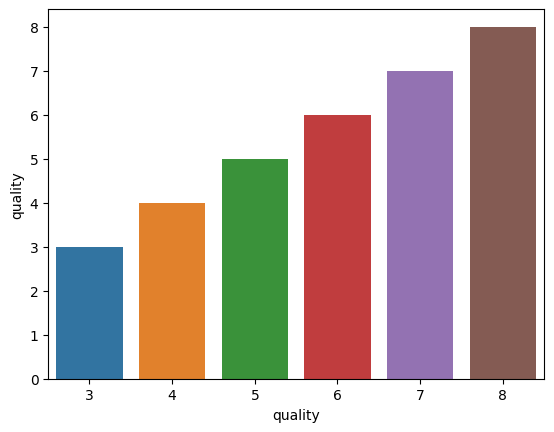

In [11]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.barplot(x='quality',y=df[i],data=df)
        plt.show()


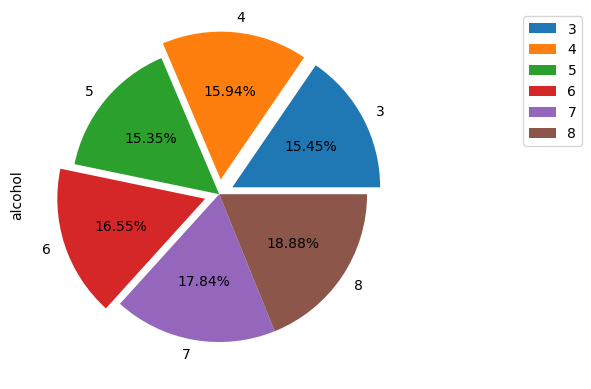

In [12]:
quality_alcohol=df.groupby(['quality'])['alcohol'].mean()
explode=0.1,0.1,0,0.1,0,0
quality_alcohol.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

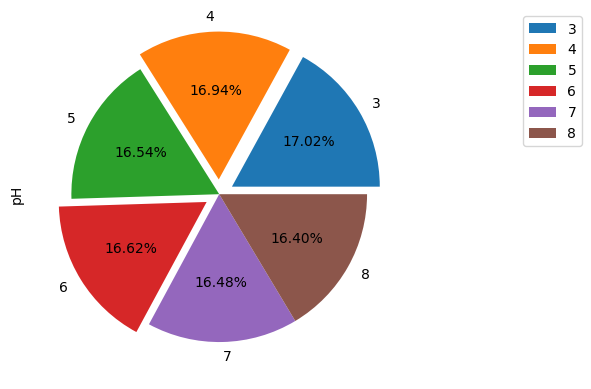

In [13]:
quality_ph=df.groupby(['quality'])['pH'].mean()
explode=0.1,0.1,0,0.1,0,0
quality_ph.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

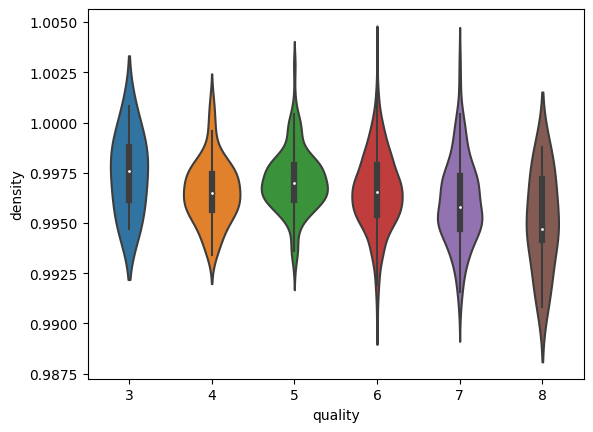

In [14]:
sns.violinplot(x='quality',y='density',data=df);

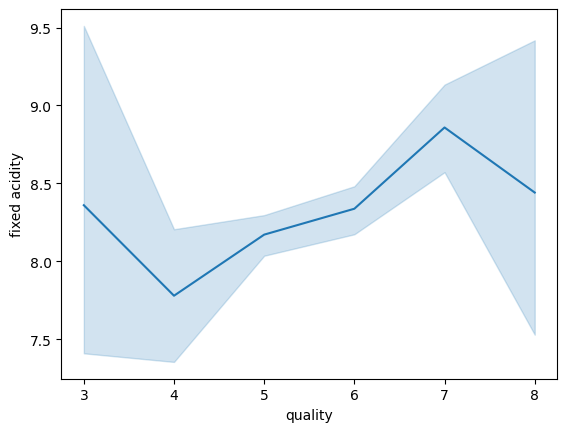

In [15]:
sns.lineplot(x='quality',y='fixed acidity',data=df);

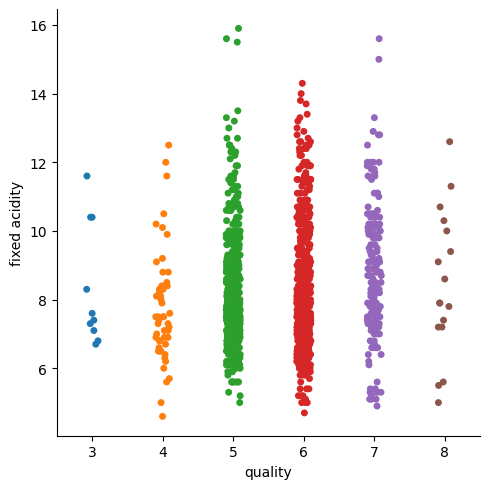

In [16]:
sns.catplot(x='quality',y='fixed acidity',data=df);

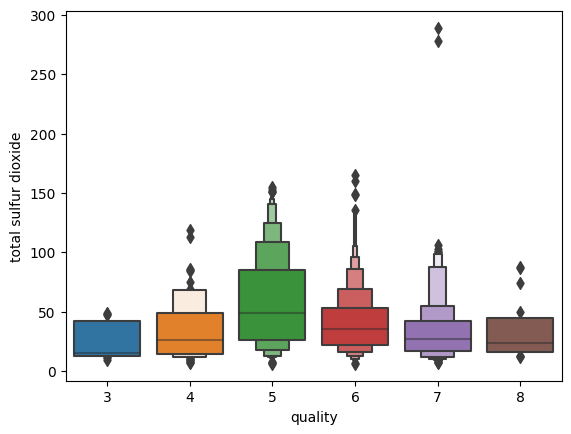

In [17]:
sns.boxenplot(x='quality',y='total sulfur dioxide',data=df);

##### Checking imbalance

In [18]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

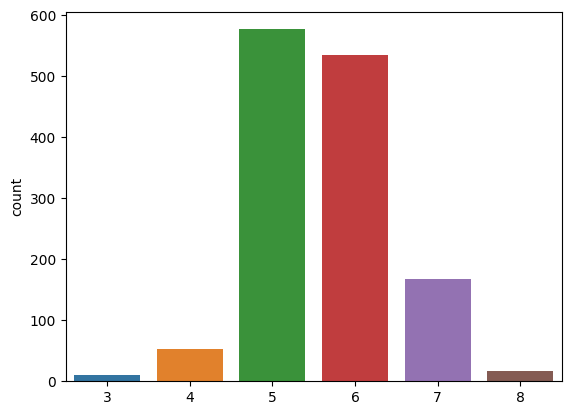

In [19]:
sns.countplot(x=y);

##### We can see that the target data is not balanced. We may useuse RandomOverSampler to balance the data

In [20]:
over_sampler = RandomOverSampler()

In [21]:
x, y = over_sampler.fit_resample(x,y)

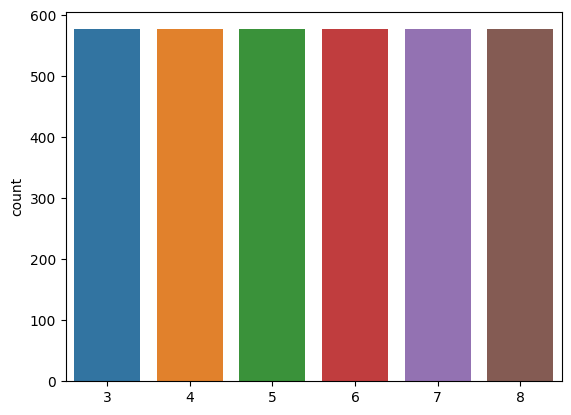

In [22]:
sns.countplot(x=y);

##### We can now see that the data is balanced correctly

### Scaling

In [23]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [24]:
sc = StandardScaler()

In [25]:
x = sc.fit_transform(x)

### Selecting RandomForest Model

In [26]:
model = RandomForestClassifier()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [28]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.8744588744588745
confusion_matrix train is::  [[457   0   0   0   0   0]
 [  0 475   0   0   0   0]
 [  0   0 458   0   0   0]
 [  0   0   0 454   0   0]
 [  0   0   0   0 469   0]
 [  0   0   0   0   0 456]]
confusion_matrix test is::  [[120   0   0   0   0   0]
 [  0 102   0   0   0   0]
 [  1   2  86  28   2   0]
 [  0   2  35  70  16   0]
 [  0   0   0   1 107   0]
 [  0   0   0   0   0 121]]
Wrong Predictions made: 87 / 693
************************************************************


In [29]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [30]:
OUTPUT

,ACTUAL,PREDICTION
0,5,5
1,5,5
2,5,5
3,6,6
4,5,5
...,...,...
3457,8,8
3458,8,8
3459,8,8
3460,8,8


##### Plotting confusion matrix for training and testing data 

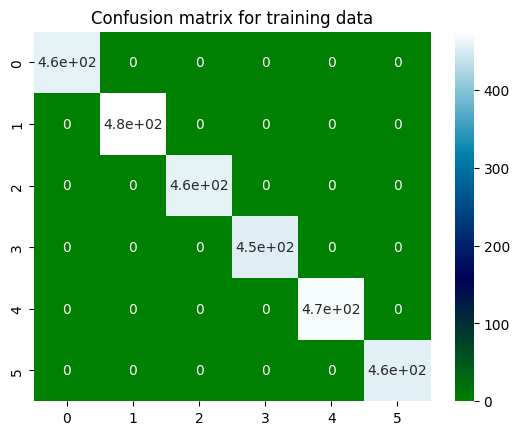

In [31]:
plt.title("Confusion matrix for training data")
sns.heatmap(con_train, annot=True, cmap='ocean');

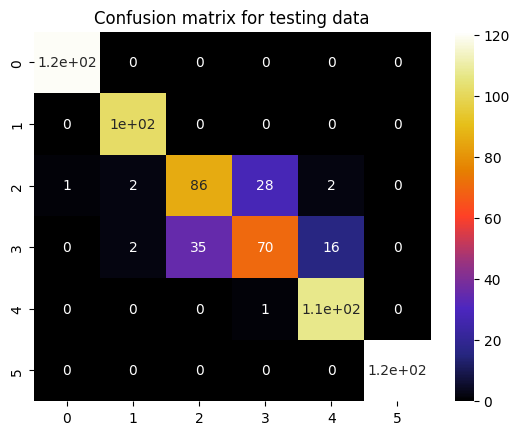

In [32]:
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='CMRmap');

##### We have to binarize the target

In [33]:
y = label_binarize(y, classes=[5, 6, 7, 4, 8, 3])
n_classes = 6

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

##### Initializing the classifier

In [35]:
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0),)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

##### Computing AUC and ROC for each class and plotting ROC curve

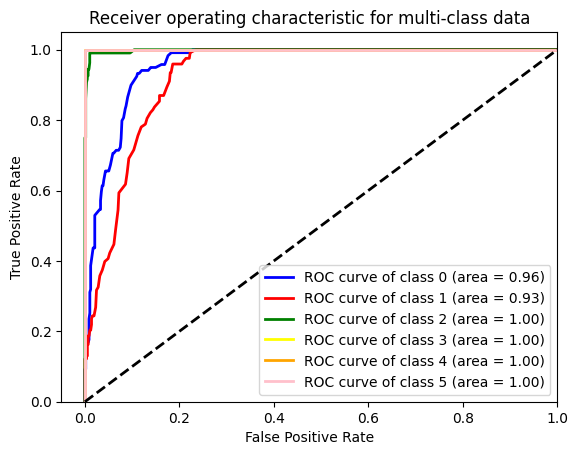

In [36]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()